<font size=4>
In the last notebook we made a neural network using Pytorch's nn.Module class. Here we'll discuss how to use torch Datasets, which allow one to efficiently do things like batch data, apply data augmentations, etc.
</font>

In [1]:
# for neural networks etc.
import torch.nn as nn
import torch

# for the dataset
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler

import numpy as np

# for plotting
import matplotlib.pyplot as plt 
from matplotlib import animation
from IPython.display import HTML

# for timing things
import time

<font size=4>
For this notebook, we're going to do something slightly more interesting than previously. We will take data from a Lorenz attractor (a standard chaotic dynamical system) and see if we can predict the future dynamics.
</font>

In [4]:
data = np.load('/home/schmittms/ML_tutorial/microbiome_data.npy', allow_pickle=True).item()

print(data.keys())

for key in data.keys():
    print(key, data[key].shape)

dict_keys(['phylum_abundance', 'no3'])
phylum_abundance (381, 28)
no3 (381, 10)


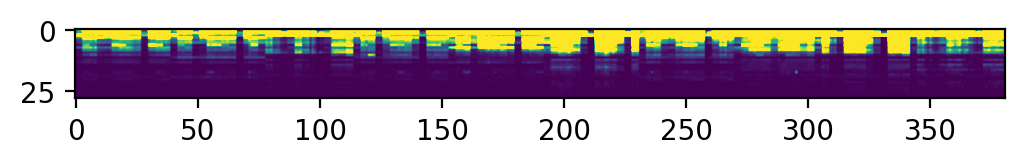

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6,2), dpi=200)
ax....

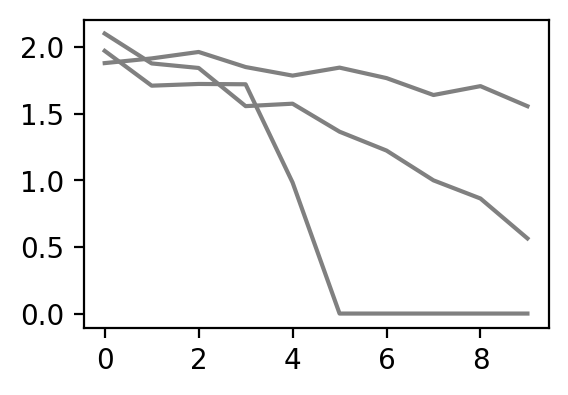

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(3,2), dpi=200)

ax...
ax...
ax...



# Modify the code below to create a NN which takes as input the abundance vectors (28 dim) and returns a prediction of the vector of nitrate dynamics (10 dim)

# Dataloader for the Lorenz dynamics data

<font size=4>
Now we'll put it all together for our real dataset. Note that I typically make the loader into an attribute of the dataset itself, as you can see below.

</font>

In [ ]:
class DatasetLorenz(Dataset):
    def __init__(self, 
                 #...
                ):
        
       
        #self.inputs = ...
        #self.targets = ...

        self.loader = self.make_loader(indices=np.arange(len(self)), batch_size=batch_size, num_workers=0, pin_memory=False)
        

    def __len__(self): # len should always return the total number of data samples
        return # ...

    def __getitem__(self, idx):
        return {'input': #
                'output': #
                'idx': idx}

    def make_loader(self, indices, batch_size, num_workers, pin_memory=True):
            sampler = SubsetRandomSampler(indices)
            loader = torch.utils.data.DataLoader(self, 
                batch_size=batch_size,
                num_workers=num_workers,
                sampler=sampler,
                pin_memory=pin_memory)
            
            return loader


In [ ]:
class NNModel(nn.Module):
    def __init__(self, 
                 ...
                 ):

        super().__init__() # initialize nn.Module

        ## MAKE THE NETWORK
        self.layers = nn.ModuleList() # this will be a list of all our neural network layers. You can append to it just like to a normal list

        # ... add layers to list ...

        # Put on device
        self.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))

        self.optimizer = torch.optim.Adam(self.parameters(), lr=optimization_hyperparameters['LR'])



    def forward(self, input):
        x = input.clone() # copy input

        for layer in self.layers:
            #
            
        return x 


In [ ]:
model = NNModel(...)

In [ ]:
# First, put the data on gpu so it will be faster. This step may be skipped
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

dataset = Dataset(...)
dataset.data = dataset.data.to(device) 
model.to(device)

print(dataset.data.shape)
print(model)

NNModel(
  (layers): ModuleList(
    (0): Linear(in_features=3, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=64, bias=True)
    (7): ReLU()
    (8): Linear(in_features=64, out_features=3, bias=True)
  )
)

In [ ]:
#prediction_history = []
loss_history = []

n_epochs = 10
print("Len dataset:", len(dataset), "Steps per epoch: ", len(dataset.loader))

t0 = time.time()


for epoch in range(n_epochs):
    for batch in dataset_lorenz.loader:
        ...

        loss = ...


        loss_history.append(loss.detach().cpu().numpy())
    print(f"Epoch {epoch}, Loss: {loss:0.3f}, Time: {time.time()-t0:0.2f}s")


Len dataset: 499800 Steps per epoch:  3905
Epoch 0, Loss: 0.190, Time: 16.58s
Epoch 1, Loss: 0.027, Time: 33.11s
Epoch 2, Loss: 0.020, Time: 49.63s
Epoch 3, Loss: 0.011, Time: 66.23s
Epoch 4, Loss: 0.010, Time: 83.05s
Epoch 5, Loss: 0.012, Time: 99.64s
Epoch 6, Loss: 0.041, Time: 116.17s
Epoch 7, Loss: 0.005, Time: 132.78s
Epoch 8, Loss: 0.004, Time: 149.32s
Epoch 9, Loss: 0.006, Time: 165.78s


# Verification


<font size=4>
Verify the predictions! How do we know if they are good?
</font>